In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Load the CSV file into a pandas DataFrame
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [3]:
# Use 'Close' prices for prediction
df = data[['Close']]

In [4]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [6]:
# Define the sequence length for LSTM
sequence_length = 10

In [7]:
# Create sequences
X, y = create_sequences(df_scaled, sequence_length)

In [8]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
51/51 [==============================] - 3s 8ms/step - loss: 0.0441
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 9.7030e-04
Epoch 6/50
51/51 [==============================] - 0s 7ms/step - loss: 9.3745e-04
Epoch 7/50
51/51 [==============================] - 0s 6ms/step - loss: 8.8669e-04
Epoch 8/50
51/51 [==============================] - 0s 8ms/step - loss: 8.6948e-04
Epoch 9/50
51/51 [==============================] - 0s 6ms/step - loss: 8.5036e-04
Epoch 10/50
51/51 [==============================] - 0s 8ms/step - loss: 8.6150e-04
Epoch 11/50
51/51 [==============================] - 0s 8ms/step - loss: 8.5182e-04
Epoch 12/50
51/51 [==============================] - 0s 7ms/step - loss: 8.2537e-04
Epoch 13/50
51/51

In [11]:
# Predict stock prices
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

13/13 [==============================] - 0s 3ms/step


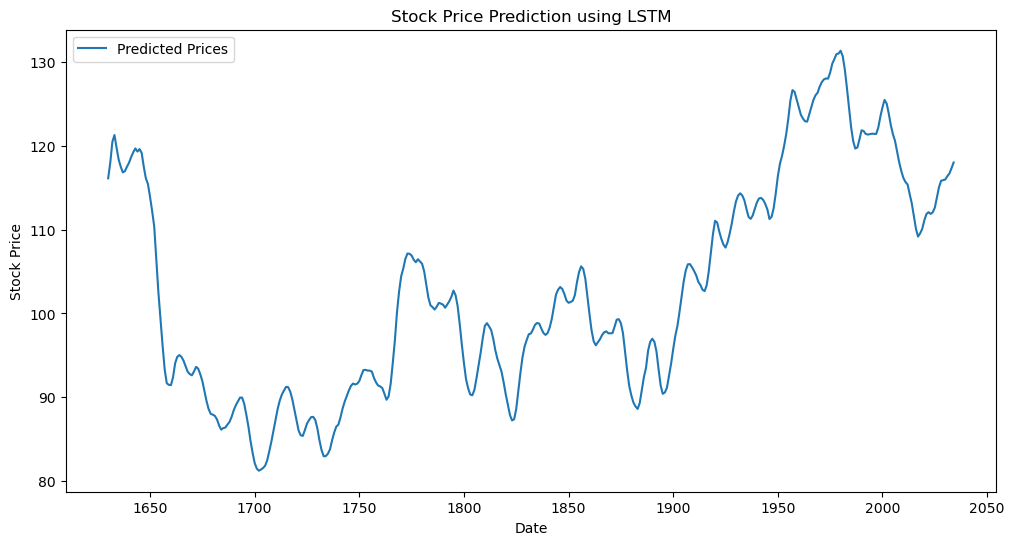

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size+sequence_length:], predicted, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()